In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rufnd-dataset/RUFND xlsx files (3800 updated sep25)/RUFND xlsx files (updated)/desktop.ini
/kaggle/input/rufnd-dataset/RUFND xlsx files (3800 updated sep25)/RUFND xlsx files (updated)/RUFND complete files/RUFND complete dataset 3800 (R).xlsx
/kaggle/input/rufnd-dataset/RUFND xlsx files (3800 updated sep25)/RUFND xlsx files (updated)/RUFND complete files/RUFND all Fake (R-2000).xlsx
/kaggle/input/rufnd-dataset/RUFND xlsx files (3800 updated sep25)/RUFND xlsx files (updated)/RUFND complete files/RUFND all True (R-1800).xlsx
/kaggle/input/rufnd-dataset/RUFND xlsx files (3800 updated sep25)/RUFND xlsx files (updated)/RUFND complete files/RUFND complete dataset 3800 (U+R).xlsx
/kaggle/input/rufnd-dataset/RUFND xlsx files (3800 updated sep25)/RUFND xlsx files (updated)/RUFND train files/RUFND all News (R-2660) TRAIN.xlsx
/kaggle/input/rufnd-dataset/RUFND xlsx files (3800 updated sep25)/RUFND xlsx files (updated)/RUFND train files/RUFND Fake News (R-1400) TRAIN.xlsx
/kaggle/inpu

In [2]:
import pandas as pd
import numpy as np
import os
import re


In [3]:
print("Folders in /kaggle/input:")
print(os.listdir("/kaggle/input"))


Folders in /kaggle/input:
['rufnd-dataset', 'isot-fake-news-dataset']


In [4]:
fake = pd.read_csv("/kaggle/input/isot-fake-news-dataset/Fake.csv")
true = pd.read_csv("/kaggle/input/isot-fake-news-dataset/True.csv")

fake["label"] = 0  # fake
true["label"] = 1  # real

isot_df = pd.concat([fake, true], ignore_index=True)
isot_df = isot_df[["text", "label"]]

print("ISOT shape:", isot_df.shape)
isot_df.head()


ISOT shape: (44898, 2)


,text,label
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


In [5]:
target_file = "RUFND complete dataset 3800 (R).xlsx"

found_paths = []
for root, dirs, files in os.walk("/kaggle/input/rufnd-dataset"):
    if target_file in files:
        found_paths.append(os.path.join(root, target_file))

print("Found RUFND file paths:")
for p in found_paths:
    print(p)

rufnd_path = found_paths[0]  # take the first match
print("\nUsing this path:", rufnd_path)


Found RUFND file paths:
/kaggle/input/rufnd-dataset/RUFND xlsx files (3800 updated sep25)/RUFND xlsx files (updated)/RUFND complete files/RUFND complete dataset 3800 (R).xlsx

Using this path: /kaggle/input/rufnd-dataset/RUFND xlsx files (3800 updated sep25)/RUFND xlsx files (updated)/RUFND complete files/RUFND complete dataset 3800 (R).xlsx


In [6]:
rufnd = pd.read_excel(rufnd_path)
print("RUFND shape:", rufnd.shape)
rufnd.head()


RUFND shape: (3800, 3)


,Sr. No.,Roman News Items,Label
0,1,video sy pta chalta hai ky royal canadian moun...,FAKE
1,2,Walmart cycles ko recycle krny ki bajaye $6.95...,FAKE
2,3,sadar joe biden israeli sadar ishaq harzog sy ...,FAKE
3,4,elon musk ny is dawye ky jawab mai is pr ghor ...,FAKE
4,5,tasweer huston mai ak shahrah dikhati hai,FAKE


In [7]:
print("RUFND columns:")
print(list(rufnd.columns))


RUFND columns:
['Sr. No.', 'Roman News Items', 'Label']


In [8]:
# Try common text column names
possible_text_cols = ["text", "news", "content", "article", "body", "News", "Content", "Article"]
text_col = next((c for c in possible_text_cols if c in rufnd.columns), None)

# Try common label column names
possible_label_cols = ["label", "Label", "class", "Class", "target", "Target", "verdict", "Verdict"]
label_col = next((c for c in possible_label_cols if c in rufnd.columns), None)

print("Detected text column:", text_col)
print("Detected label column:", label_col)

if text_col is None or label_col is None:
    print("\nAuto-detection failed. Look at this sample and pick correct columns:")
    display(rufnd.head(3))


Detected text column: None
Detected label column: Label

Auto-detection failed. Look at this sample and pick correct columns:


,Sr. No.,Roman News Items,Label
0,1,video sy pta chalta hai ky royal canadian moun...,FAKE
1,2,Walmart cycles ko recycle krny ki bajaye $6.95...,FAKE
2,3,sadar joe biden israeli sadar ishaq harzog sy ...,FAKE


In [9]:
# ----- MANUALLY SET CORRECT COLUMNS -----
text_col = "Roman News Items"
label_col = "Label"

# ----- SELECT & RENAME -----
rufnd_df = rufnd[[text_col, label_col]].copy()
rufnd_df.columns = ["text", "label"]

# ----- CLEAN LABELS -----
rufnd_df["label"] = rufnd_df["label"].astype(str).str.strip().str.lower()

rufnd_df["label"] = rufnd_df["label"].replace({
    "fake": 0,
    "false": 0,
    "0": 0,
    "real": 1,
    "true": 1,
    "1": 1
})

rufnd_df["label"] = pd.to_numeric(rufnd_df["label"], errors="coerce")

# ----- DROP INVALID ROWS -----
rufnd_df = rufnd_df.dropna(subset=["text", "label"])
rufnd_df = rufnd_df[rufnd_df["label"].isin([0, 1])]

print("✅ RUFND standardized successfully")
print("Shape:", rufnd_df.shape)

rufnd_df.head()


✅ RUFND standardized successfully
Shape: (3800, 2)


/tmp/ipykernel_17/55390569.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  rufnd_df["label"] = rufnd_df["label"].replace({


,text,label
0,video sy pta chalta hai ky royal canadian moun...,0
1,Walmart cycles ko recycle krny ki bajaye $6.95...,0
2,sadar joe biden israeli sadar ishaq harzog sy ...,0
3,elon musk ny is dawye ky jawab mai is pr ghor ...,0
4,tasweer huston mai ak shahrah dikhati hai,0


In [10]:
final_df = pd.concat([isot_df, rufnd_df], ignore_index=True)

# remove empty rows
final_df = final_df.dropna(subset=["text", "label"])
final_df = final_df[final_df["label"].isin([0, 1])]

print("Final dataset shape:", final_df.shape)
print(final_df["label"].value_counts())

final_df.head()


Final dataset shape: (48698, 2)
label
0    25481
1    23217
Name: count, dtype: int64


,text,label
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


In [11]:
import re

def clean_text(s):
    s = str(s).lower()
    s = re.sub(r"http\S+|www\S+", " ", s)   # remove URLs
    s = re.sub(r"[^a-z\s]", " ", s)         # keep only letters
    s = re.sub(r"\s+", " ", s).strip()      # remove extra spaces
    return s

final_df["text_clean"] = final_df["text"].apply(clean_text)

final_df[["text_clean", "label"]].head()


,text_clean,label
0,donald trump just couldn t wish all americans ...,0
1,house intelligence committee chairman devin nu...,0
2,on friday it was revealed that former milwauke...,0
3,on christmas day donald trump announced that h...,0
4,pope francis used his annual christmas day mes...,0


In [12]:
from sklearn.model_selection import train_test_split

X = final_df["text_clean"]
y = final_df["label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


Train size: (38958,)
Test size: (9740,)


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words="english", max_df=0.7, min_df=2)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf  = vectorizer.transform(X_test)

print("TF-IDF Train:", X_train_tfidf.shape)
print("TF-IDF Test :", X_test_tfidf.shape)


TF-IDF Train: (38958, 63910)
TF-IDF Test : (9740, 63910)


In [14]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

print("✅ Model trained")


✅ Model trained


Confusion Matrix:
[[4995  101]
 [ 113 4531]]

True Positive (TP): 4531
False Positive (FP): 101
True Negative (TN): 4995
False Negative (FN): 113

Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      5096
           1       0.98      0.98      0.98      4644

    accuracy                           0.98      9740
   macro avg       0.98      0.98      0.98      9740
weighted avg       0.98      0.98      0.98      9740

ROC AUC Score: 0.9975814490972299


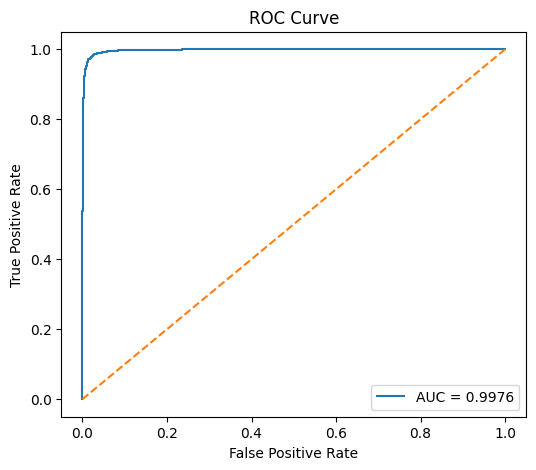

In [15]:
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve
)
import matplotlib.pyplot as plt

# Predictions (class labels)
y_pred = model.predict(X_test_tfidf)

# Probabilities (needed for AUC)
y_prob = model.predict_proba(X_test_tfidf)[:, 1]

# ---- CONFUSION MATRIX ----
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

print("Confusion Matrix:")
print(cm)

print("\nTrue Positive (TP):", tp)
print("False Positive (FP):", fp)
print("True Negative (TN):", tn)
print("False Negative (FN):", fn)

# ---- CLASSIFICATION REPORT ----
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# ---- ROC AUC SCORE ----
auc_score = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", auc_score)

# ---- ROC CURVE ----
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.4f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()



In [16]:
def predict_news(news_text):
    news_text = clean_text(news_text)
    v = vectorizer.transform([news_text])
    pred = model.predict(v)[0]
    return "FAKE ❌" if pred == 0 else "REAL ✅"

print(predict_news("Government announces new education policy for 2026"))
print(predict_news("Miracle cure discovered, doctors don't want you to know"))


FAKE ❌
FAKE ❌


In [17]:
import joblib

joblib.dump(vectorizer, "vectorizer.pkl")
joblib.dump(model, "model.pkl")

print("Saved vectorizer.pkl and model.pkl")


Saved vectorizer.pkl and model.pkl
